In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

In [7]:
# import
import numpy as np
import seaborn as sns # iris 데이터
from sklearn.model_selection import train_test_split # 데이터 분할(층화추출)
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, Input, add
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt   # 학습과정 시각화

In [ ]:
# 데이터 생성 및 전처리(라벨인코딩만 하고, 원핫인코딩 X)

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
# iris.keys()
iris_X = iris.data
iris_y = iris.target  # 라벨인코딩이 되어 있음
iris_X.shape, iris_y.shape
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y,
                                                   test_size=0.1,
                                                   stratify= iris_y,
                                                   random_state=4)
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((135, 4), (135,), (15, 4), (15,))

# 1. 기본적인 DNN(원핫인코딩X)

In [12]:
# 모델 설정
# model = Sequential()
# model.add(Input(4,))
# model.add(Dense(units=50, activation='relu'))
# model.add(Dense(units=30, activation='relu'))
# model.add(Dense(units=3, activation='softmax'))

model = Sequential([
    Input(4,),
    Dense(units=50, activation='relu'),
    Dense(units=30, activation='relu'),
    Dense(units=3, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                250       
                                                                 
 dense_10 (Dense)            (None, 30)                1530      
                                                                 
 dense_11 (Dense)            (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 학습설정
model.compile(loss='sparse_categorical_crossentropy',  # 라벨인코딩만 되어 있는 경우
             optimizer='adam',
             metrics=['accuracy'])
earlyStopping = EarlyStopping(patience=50)  # monitor = 'val_loss' 기본값
hist = model.fit(train_X, train_y,
                epochs=1000,
                validation_split=0.2,
                callbacks=[earlyStopping])

Epoch 1/1000
4/4 [==============================] - 1s 66ms/step - loss: 1.2742 - accuracy: 0.3426 - val_loss: 1.1290 - val_accuracy: 0.2963
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.0641 - accuracy: 0.3519 - val_loss: 0.9958 - val_accuracy: 0.4444
Epoch 3/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.9713 - accuracy: 0.6019 - val_loss: 0.9344 - val_accuracy: 0.6667
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.9143 - accuracy: 0.6667 - val_loss: 0.8820 - val_accuracy: 0.7037
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.8651 - accuracy: 0.6574 - val_loss: 0.8299 - val_accuracy: 0.7037
Epoch 6/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.8109 - accuracy: 0.6574 - val_loss: 0.7737 - val_accuracy: 0.7037
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7565 - accuracy: 0.7037 - val_loss: 0.7181 - val_accuracy: 0.8148
Epoch 8/1000


Epoch 59/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1719 - accuracy: 0.9815 - val_loss: 0.1371 - val_accuracy: 0.9630
Epoch 60/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1697 - accuracy: 0.9815 - val_loss: 0.1355 - val_accuracy: 0.9630
Epoch 61/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1672 - accuracy: 0.9815 - val_loss: 0.1308 - val_accuracy: 1.0000
Epoch 62/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1643 - accuracy: 0.9815 - val_loss: 0.1297 - val_accuracy: 0.9630
Epoch 63/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1594 - accuracy: 0.9815 - val_loss: 0.1338 - val_accuracy: 0.9630
Epoch 64/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1643 - accuracy: 0.9722 - val_loss: 0.1463 - val_accuracy: 0.9630
Epoch 65/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1630 - accuracy: 0.9630 - val_loss: 0.1272 - val_accuracy: 0.9630
Epoch 

4/4 [==============================] - 0s 11ms/step - loss: 0.0914 - accuracy: 0.9907 - val_loss: 0.0783 - val_accuracy: 0.9630
Epoch 117/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0934 - accuracy: 0.9907 - val_loss: 0.0777 - val_accuracy: 0.9630
Epoch 118/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0892 - accuracy: 0.9907 - val_loss: 0.0803 - val_accuracy: 0.9630
Epoch 119/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0893 - accuracy: 0.9815 - val_loss: 0.0817 - val_accuracy: 0.9630
Epoch 120/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0907 - accuracy: 0.9815 - val_loss: 0.0806 - val_accuracy: 0.9630
Epoch 121/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0881 - accuracy: 0.9815 - val_loss: 0.0766 - val_accuracy: 0.9630
Epoch 122/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0870 - accuracy: 0.9907 - val_loss: 0.0760 - val_accuracy: 0.9630
Epoch 123/1000

4/4 [==============================] - 0s 12ms/step - loss: 0.0702 - accuracy: 0.9907 - val_loss: 0.0684 - val_accuracy: 0.9630
Epoch 174/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0705 - accuracy: 0.9907 - val_loss: 0.0684 - val_accuracy: 0.9630
Epoch 175/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0711 - accuracy: 0.9907 - val_loss: 0.0677 - val_accuracy: 0.9630
Epoch 176/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0675 - accuracy: 0.9907 - val_loss: 0.0701 - val_accuracy: 0.9630
Epoch 177/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0691 - accuracy: 0.9907 - val_loss: 0.0737 - val_accuracy: 0.9630
Epoch 178/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0714 - accuracy: 0.9815 - val_loss: 0.0704 - val_accuracy: 0.9630
Epoch 179/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0691 - accuracy: 0.9907 - val_loss: 0.0675 - val_accuracy: 0.9630
Epoch 180/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.0608 - accuracy: 0.9907 - val_loss: 0.0689 - val_accuracy: 0.9259


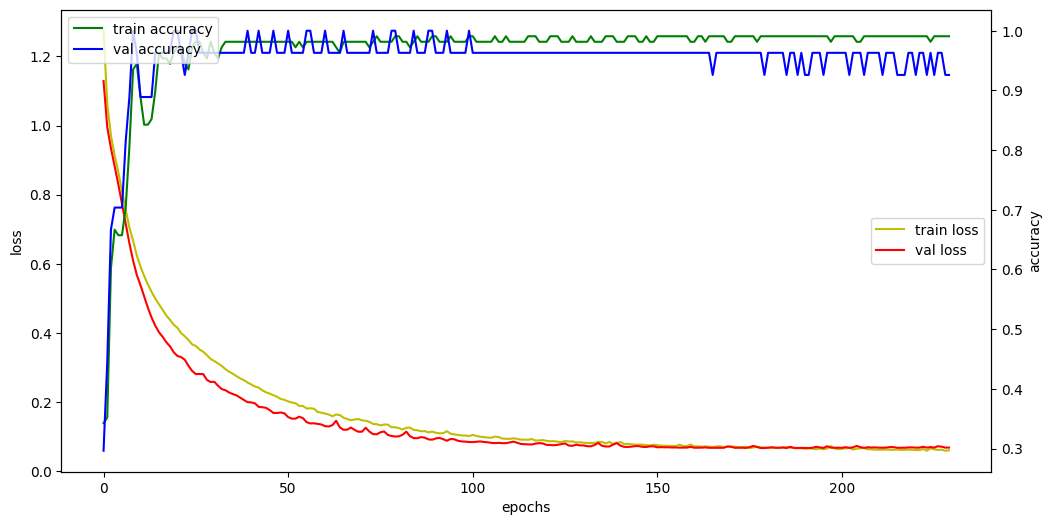

In [18]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(loc='upper left')
plt.show()

# 2. sklearn 이용
- 원핫인코딩을 하지 않고 라벨인코딩까지만 해야 작동. numpy 배열

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
# 머신러닝 3장 교안 43page
mlp_model = MLPClassifier(hidden_layer_sizes=(50,30),
                     activation='relu',
                     solver='adam',
                     alpha=0.0001,  # 과적합 방지 강도
                     batch_size=40,
                     max_iter=1000, # epoch
                     early_stopping=True, # 조기 종료 활성화(val_loss)
                     n_iter_no_change=50,  # patience
                     validation_fraction=0.1, # 검증셋 비율
                     warm_start=False, # True 일 경우 이전학습에 이어서 학습
                     )

In [21]:
mlp_model.fit(train_X, train_y)

MLPClassifier(batch_size=40, early_stopping=True, hidden_layer_sizes=(50, 30),
              max_iter=1000, n_iter_no_change=50)

In [32]:
# 모델 평가 : accuracy(test_X, test_y) /  recall, precision(test_X,yhat)
from sklearn.metrics import recall_score, precision_score
accuracy = mlp_model.score(test_X, test_y)
yhat = mlp_model.predict(test_X)
recall = recall_score(test_y, yhat, average='weighted')
precision = precision_score(test_y, yhat, average='weighted')
print('정확도 : ',accuracy)
print('재현율 : ',recall)
print('정밀도 : ',precision)
print('교차표 \n : ',pd.crosstab(test_y, yhat,
                             rownames=['실제'],
                             colnames=['예측']))


정확도 :  0.8
재현율 :  0.8
정밀도 :  0.875
교차표 
 :  예측  0  1  2
실제         
0   5  0  0
1   0  2  3
2   0  0  5


# 3. 클래스 이용

In [35]:
class DNNClassifier:
    @staticmethod
    def build(input_dim=4, activation='relu', optimizer='adam'):
#         model = Sequential()
#         model.add(Input(input_dim, ))
#         model.add(Dense(50, activation=activation))
#         model.add(Dense(30, activation=activation))
#         model.add(Dense(3, activation='softmax'))
        model = Sequential([
            Input(input_dim,),
            Dense(50, activation=activation),
            Dense(30, activation=activation),
            Dense(3, activation='softmax')
        ])
        # 모델 학습 설정
        model.compile(loss='sparse_categorical_crossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])
        return model
         

In [39]:
%%time
# 모델 
model = DNNClassifier.build(input_dim=4, activation='relu')
model.summary()
# 모델 학습
hist = model.fit(train_X, train_y,
                epochs=500,
                validation_split=0.2,
                verbose=0)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 50)                250       
                                                                 
 dense_25 (Dense)            (None, 30)                1530      
                                                                 
 dense_26 (Dense)            (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________
CPU times: total: 18.7 s
Wall time: 14.1 s


In [40]:
loss, accuracy = model.evaluate(test_X, test_y)
loss, accuracy

1/1 [==============================] - 0s 23ms/step - loss: 0.0274 - accuracy: 1.0000


(0.027369175106287003, 1.0)

# 4. 함수형 API 이용하기
- 병렬처리 : 속도를 높이기 위해 
- 레지듀열블록(Residual block) : 모델의 성능을 높이기 위해(자연어처리, 이미지처리)

In [41]:
# import
import numpy as np
import seaborn as sns # iris 데이터
from sklearn.model_selection import train_test_split # 데이터 분할(층화추출)
from tensorflow.keras import Model # 모델 생성(입력층과 출력층을 이용)
from tensorflow.keras.layers import Dense, Input, add  # add : 레지듀얼블록
from tensorflow.keras.layers import concatenate  # 병열처리시 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt   # 학습과정 시각화

In [42]:
from sklearn import datasets
iris = datasets.load_iris()
# iris.keys()
iris_X = iris.data
iris_y = iris.target  # 라벨인코딩이 되어 있음
iris_X.shape, iris_y.shape
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y,
                                                   test_size=0.1,
                                                   stratify= iris_y,
                                                   random_state=4)
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((135, 4), (135,), (15, 4), (15,))

In [46]:
# 기존의 model 스타일 4 -> 50 -> 30 -> 3
input_ = Input(shape=(4,))
dense1 = Dense(units=50, activation='relu')(input_)
dense2 = Dense(units=30, activation='relu')(dense1)
dense3 = Dense(units=3, activation='softmax')(dense2)
model = Model(inputs=input_, outputs=dense3)
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(train_X, train_y, epochs=20,
         validation_split=0.2)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_36 (Dense)            (None, 50)                250       
                                                                 
 dense_37 (Dense)            (None, 30)                1530      
                                                                 
 dense_38 (Dense)            (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
4/4 [==============================] - 0s 57ms/step - loss: 1.6640 - accuracy: 0.2963 - val_loss: 1.0525 - val_accuracy: 0.4815
Epoch 2/20
4/4 [==============================] - 

In [48]:
# 병렬처리
# 4 -> 160(50, 80, 30로 병렬처리) -> 32 -> 3
input_ = Input(shape=(4,))
dense1 = Dense(units=50, activation='relu')(input_)
dense2 = Dense(units=80, activation='relu')(input_)
dense3 = Dense(units=30, activation='relu')(input_)
x = concatenate([dense1, dense2, dense3])
# x = Dense(160, activation='relu')(input_)의 병렬처리
dense4 = Dense(units=32, activation='relu')(x)
output = Dense(3, activation='softmax')(dense4)
model = Model(inputs=input_, outputs=output)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 4)]          0           []                               
                                                                                                  
 dense_44 (Dense)               (None, 50)           250         ['input_15[0][0]']               
                                                                                                  
 dense_45 (Dense)               (None, 80)           400         ['input_15[0][0]']               
                                                                                                  
 dense_46 (Dense)               (None, 30)           150         ['input_15[0][0]']               
                                                                                            

In [51]:
%%time
# 레지듀얼블록(Residual Block) : 딥러닝에서 딥한 네트워크가 학습이 잘 되지 않을 때
# 4 -> 50 -> 128 ->  50 -> (레지듀얼) -> 3
input_ = Input(shape=(4,))
dense1 = Dense(units=50, activation='relu')(input_)
dense2 = Dense(units=50, activation='relu')(dense1)
dense3 = add([dense1, dense2])
output = Dense(units=3, activation='softmax')(dense3)
model = Model(inputs=input_, outputs=output)
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(train_X, train_y,
         epochs=500,
         validation_split=0.2,
         verbose=0)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 4)]          0           []                               
                                                                                                  
 dense_55 (Dense)               (None, 50)           250         ['input_18[0][0]']               
                                                                                                  
 dense_56 (Dense)               (None, 50)           2550        ['dense_55[0][0]']               
                                                                                                  
 add_2 (Add)                    (None, 50)           0           ['dense_55[0][0]',               
                                                                  'dense_56[0][0]']         

In [52]:
model.evaluate(test_X, test_y)

1/1 [==============================] - 0s 21ms/step - loss: 0.0211 - accuracy: 1.0000


[0.02114107459783554, 1.0]

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
# iris.keys()
iris_X = iris.data
iris_y = iris.target  # 라벨인코딩이 되어 있음
iris_X.shape, iris_y.shape
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y,
                                                   test_size=0.1,
                                                   stratify= iris_y,
                                                   random_state=4)
train_X.shape, train_y.shape, test_X.shape, test_y.shape

model = Sequential([
    Input(4,),
    Dense(units=50, activation='relu'),
    Dense(units=30, activation='relu'),
    Dense(units=3, activation='softmax')
])

model.summary()

# 학습설정
model.compile(loss='sparse_categorical_crossentropy',  # 라벨인코딩만 되어 있는 경우
             optimizer='adam',
             metrics=['accuracy'])
earlyStopping = EarlyStopping(patience=50)  # monitor = 'val_loss' 기본값
hist = model.fit(train_X, train_y,
                epochs=1000,
                validation_split=0.2,
                callbacks=[earlyStopping])